In [1]:
!git clone https://github.com/fernandoseara/practica_dl.git

Cloning into 'practica_dl'...
remote: Enumerating objects: 6278, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6278 (delta 1), reused 6 (delta 1), pack-reused 6272 (from 1)
Receiving objects: 100% (6278/6278), 106.36 MiB | 36.78 MiB/s, done.
Resolving deltas: 100% (415/415), done.
Updating files: 100% (6257/6257), done.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def unet_model(input_size=(240, 240, 1)):
    inputs = layers.Input(input_size)

    # Encoder (Contracción)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Expansión)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)  # Salida binaria

    return Model(inputs, outputs)

# Crear el modelo
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 240, 240, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 240, 240, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 240, 240, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 120, 120, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 120, 120, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 120, 120, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 60, 60, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 60, 60, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 30, 30, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 30, 30, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 30, 30, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 15, 15, 512)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 15, 15, 1024)   │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 15, 15, 1024)   │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 30, 30, 512)    │      2,097,664 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 30, 30, 1024)   │              0 │ conv2d_transpose[0][0… │
│                      

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import numpy as np
import tensorflow as tf
import cv2
import os
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split

# Directorios
IMG_TRAIN_DIR = "practica_dl/data/training_data/t1"
MASK_TRAIN_DIR = "practica_dl/data/training_data/masks"
IMG_TEST_DIR = "practica_dl/data/validation_data/t1"
MASK_TEST_DIR = "practica_dl/data/validation_data/masks"

# Tamaño de entrada
IMG_SIZE = (240, 240)

# Cargar imágenes y máscaras
def load_images(img_dir, mask_dir):
    images = []
    masks = []

    for filename in os.listdir(img_dir):
        img = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0  # Normalización
        images.append(img)

        mask_filename = filename.split('_')[0]+'_seg.png'
        mask = cv2.imread(os.path.join(mask_dir, mask_filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, IMG_SIZE)
        mask = mask / 255.0  # Normalización
        masks.append(mask)

    return np.array(images).reshape(-1, 240, 240, 1), np.array(masks).reshape(-1, 240, 240, 1)

X_train, Y_train = load_images(IMG_TRAIN_DIR, MASK_TRAIN_DIR)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_test, Y_test = load_images(IMG_TEST_DIR, MASK_TEST_DIR)

# Convertir a `tf.data.Dataset`
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(8)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entrenar el modelo con early stopping
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,                # Máximo número de épocas
    batch_size=32,            # Tamaño del batch (ajústalo según tu hardware)
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 788ms/step - accuracy: 0.9730 - loss: 0.0657 - val_accuracy: 0.9738 - val_loss: 0.0635
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step - accuracy: 0.9755 - loss: 0.0599 - val_accuracy: 0.9718 - val_loss: 0.0654
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 426ms/step - accuracy: 0.9762 - loss: 0.0582 - val_accuracy: 0.9772 - val_loss: 0.0558
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 424ms/step - accuracy: 0.9785 - loss: 0.0519 - val_accuracy: 0.9774 - val_loss: 0.0560
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.9803 - loss: 0.0485 - val_accuracy: 0.9781 - val_loss: 0.0544
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 425ms/step - accuracy: 0.9806 - loss: 0.0477 - val_accuracy: 0.9783 - val_loss: 0.0535
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - accuracy: 0.9818 - loss: 0.0447 - val_accuracy: 0.9788 - val_loss: 0.0529
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.9828 - loss: 0

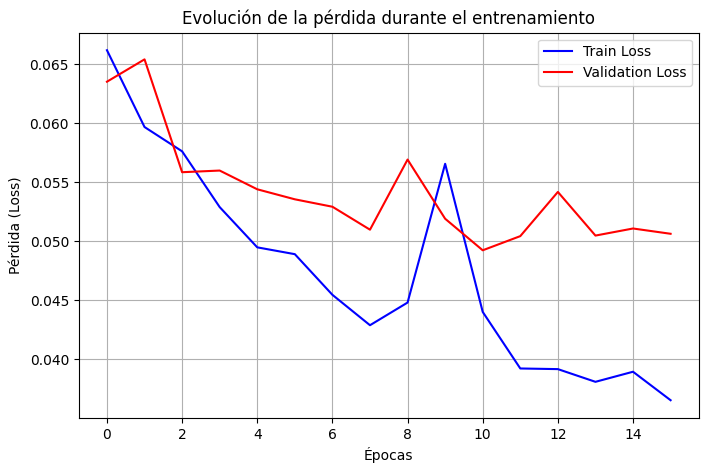

In [27]:
import matplotlib.pyplot as plt

# Extraer los valores de pérdida
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.grid()
plt.show()

In [28]:
def dice_coefficient(y_true, y_pred, smooth=1):
  y_true_f = tf.keras.backend.flatten(y_true)
  y_pred_f = tf.keras.backend.flatten(y_pred)
  intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
  union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)
  return (2. * intersection + smooth) / (union + smooth)

# Evaluar en el conjunto de validación
y_pred = model.predict(X_test)
y_pred_thresholded = (y_pred > 0.5).astype(np.float64)

dice_score = dice_coefficient(Y_test, y_pred_thresholded)
print(f"Dice Score: {dice_score.numpy():.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step
Dice Score: 0.7624


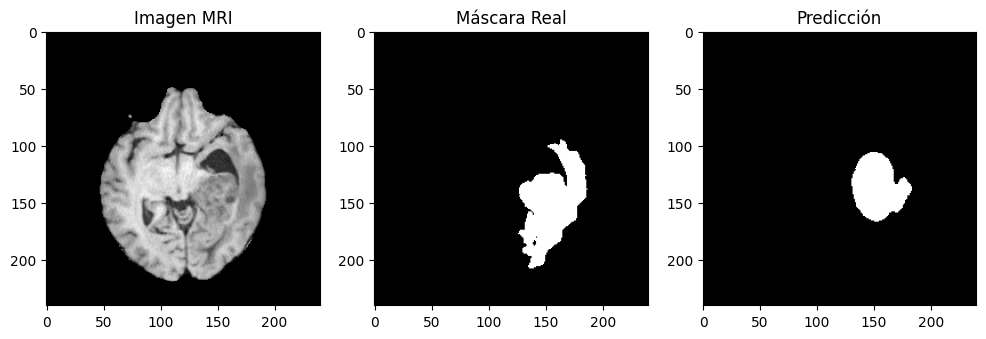

In [30]:
import matplotlib.pyplot as plt

def plot_sample(img, mask, pred):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Imagen MRI")

    plt.subplot(1, 3, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Máscara Real")

    plt.subplot(1, 3, 3)
    plt.imshow(pred.squeeze(), cmap='gray')
    plt.title("Predicción")

    plt.show()

# Mostrar ejemplo
idx = 5
plot_sample(X_test[idx], Y_test[idx], y_pred_thresholded[idx])

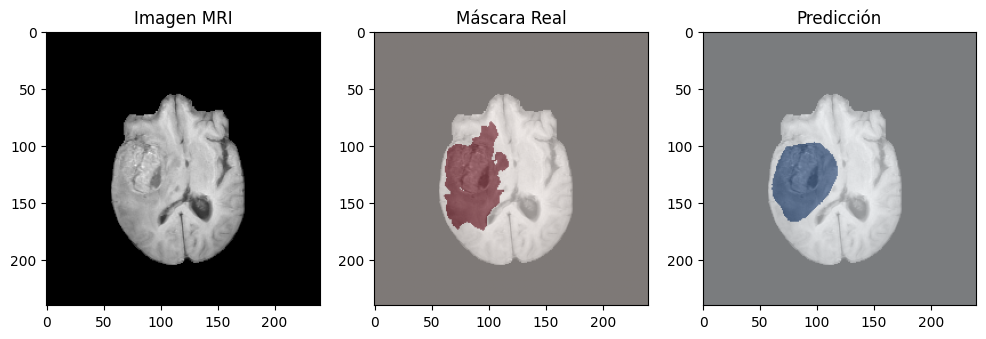

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_supersample(img, mask, pred, alpha=0.5):
    plt.figure(figsize=(12, 4))

    # Imagen original en escala de grises
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Imagen MRI")

    # Imagen con máscara real superpuesta en rojo
    plt.subplot(1, 3, 2)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.imshow(mask.squeeze(), cmap='Reds', alpha=alpha)  # Rojo semitransparente
    plt.title("Máscara Real")

    # Imagen con predicción superpuesta en azul
    plt.subplot(1, 3, 3)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.imshow(pred.squeeze(), cmap='Blues', alpha=alpha)  # Azul semitransparente
    plt.title("Predicción")

    plt.show()

# Mostrar ejemplo
idx = 1
plot_supersample(X_test[idx], Y_test[idx], y_pred_thresholded[idx])